# References

1.  [Analytics Vidya Time Series Analysis](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/) 
2.  [ML approaches for Time Series Data - Towards Data Science](https://towardsdatascience.com/ml-approaches-for-time-series-4d44722e48fe)

# Stock Market Prediction LSTM

## Imports

In [1]:
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import plotly.express as pex

import torch
import torch.nn as nn

c:\Users\krato\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Berkshire Hathway (B)

### Preamble

In [50]:
with open(os.path.join(os.getcwd(), "AlphaVantageKey.txt"), "r") as f:
    key = f.readline()
    print(key)

J6D9E2FQ5CV6EI5S


### Main

#### Get Stock name

In [9]:
ticker = input("Enter the stock name of the company!")
print(f"The company stock name you have entered is: {ticker}")

The company stock name you have entered is: BRK.B


#### 1. Get data from AlphaVantage

In [27]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&apikey=%s&outputsize=full"%(ticker, key)
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'BRK.B', '3. Last Refreshed': '2025-01-17', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-01-17': {'1. open': '464.7100', '2. high': '470.1800', '3. low': '462.4547', '4. close': '467.9500', '5. volume': '6466973'}, '2025-01-16': {'1. open': '458.9300', '2. high': '462.9600', '3. low': '458.3001', '4. close': '462.8100', '5. volume': '3475694'}, '2025-01-15': {'1. open': '455.5500', '2. high': '459.0900', '3. low': '453.2700', '4. close': '458.5100', '5. volume': '4719411'}, '2025-01-14': {'1. open': '445.5000', '2. high': '450.3000', '3. low': '443.9200', '4. close': '450.0300', '5. volume': '4055602'}, '2025-01-13': {'1. open': '442.0400', '2. high': '445.0000', '3. low': '441.1500', '4. close': '443.9100', '5. volume': '3639248'}, '2025-01-10': {'1. open': '452.6600', '2. high': '453.0000', '3. low': '440.1000', '4. close': '442.6600', '5. 

In [28]:
data['Time Series (Daily)']

{'2025-01-17': {'1. open': '464.7100',
  '2. high': '470.1800',
  '3. low': '462.4547',
  '4. close': '467.9500',
  '5. volume': '6466973'},
 '2025-01-16': {'1. open': '458.9300',
  '2. high': '462.9600',
  '3. low': '458.3001',
  '4. close': '462.8100',
  '5. volume': '3475694'},
 '2025-01-15': {'1. open': '455.5500',
  '2. high': '459.0900',
  '3. low': '453.2700',
  '4. close': '458.5100',
  '5. volume': '4719411'},
 '2025-01-14': {'1. open': '445.5000',
  '2. high': '450.3000',
  '3. low': '443.9200',
  '4. close': '450.0300',
  '5. volume': '4055602'},
 '2025-01-13': {'1. open': '442.0400',
  '2. high': '445.0000',
  '3. low': '441.1500',
  '4. close': '443.9100',
  '5. volume': '3639248'},
 '2025-01-10': {'1. open': '452.6600',
  '2. high': '453.0000',
  '3. low': '440.1000',
  '4. close': '442.6600',
  '5. volume': '5471869'},
 '2025-01-08': {'1. open': '453.6300',
  '2. high': '454.0000',
  '3. low': '449.6300',
  '4. close': '451.8400',
  '5. volume': '3933259'},
 '2025-01-07'

#### 2. Data Loading
1. If file exists, read the file
2. Else save the data to the file for future use

In [26]:
file_data = "Stock_Data_%s.csv"%(ticker)
print(file_data)


Stock_Data_BRK.B.csv


In [29]:
file_data

'Stock_Data_BRK.B.csv'

In [30]:
data['Time Series (Daily)']

{'2025-01-17': {'1. open': '464.7100',
  '2. high': '470.1800',
  '3. low': '462.4547',
  '4. close': '467.9500',
  '5. volume': '6466973'},
 '2025-01-16': {'1. open': '458.9300',
  '2. high': '462.9600',
  '3. low': '458.3001',
  '4. close': '462.8100',
  '5. volume': '3475694'},
 '2025-01-15': {'1. open': '455.5500',
  '2. high': '459.0900',
  '3. low': '453.2700',
  '4. close': '458.5100',
  '5. volume': '4719411'},
 '2025-01-14': {'1. open': '445.5000',
  '2. high': '450.3000',
  '3. low': '443.9200',
  '4. close': '450.0300',
  '5. volume': '4055602'},
 '2025-01-13': {'1. open': '442.0400',
  '2. high': '445.0000',
  '3. low': '441.1500',
  '4. close': '443.9100',
  '5. volume': '3639248'},
 '2025-01-10': {'1. open': '452.6600',
  '2. high': '453.0000',
  '3. low': '440.1000',
  '4. close': '442.6600',
  '5. volume': '5471869'},
 '2025-01-08': {'1. open': '453.6300',
  '2. high': '454.0000',
  '3. low': '449.6300',
  '4. close': '451.8400',
  '5. volume': '3933259'},
 '2025-01-07'

In [51]:
# Check if there is no file to load data from, then save the dataframe to that file
path = os.getcwd()
p = os.path.join(path , file_data)
if not os.path.exists(p):
    # Define all columns for the dataframe - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    df = pd.DataFrame(columns=['Date', 'Low', 'High', 'Open', 'Close', 'Volume'])
    
    
    # Get the actual data
    to_write = data['Time Series (Daily)']
    print(len(to_write))
    
    # Iterate over the data and save it in appropriate format to the dataframe
    for k, v in to_write.items():
        date = datetime.datetime.strptime(k, '%Y-%m-%d')
        # print(v)
        data_row = [date.date(), float(v['3. low']), float(v['2. high']), float(v['1. open']), float(v['4. close']), float(v['5. volume'])]
        
        #Add data to the dataframe 
        df.loc[-1, :] = data_row
        
        # Add another empty row
        df.index = df.index + 1
        
    # Save data to file
    print(f"saving data to file: {p}")
    df.to_csv(p, index=False)
    
    # Check if saving to file worked
    print("Could not save file!") if not os.path.exists(p) else print("File Saved Successfully!")
    
else:
    print(f"Reading data from file: {p}")
    df = pd.read_csv(p)

6343
saving data to file: d:\Projects\Stock_Data_BRK.B.csv
File Saved Successfully!


## Exploratory Data Analysis

#### 1. Sorting Data

In [10]:
df.head()

Date     Low      High    Open   Close     Volume
0  2025-01-10  440.10  453.0000  452.66  442.66  5471869.0
1  2025-01-08  449.63  454.0000  453.63  451.84  3933259.0
2  2025-01-07  451.10  456.5150  452.80  452.92  3507166.0
3  2025-01-06  450.57  456.2399  453.85  451.41  4072913.0
4  2025-01-03  450.12  454.5269  452.53  453.56  2887160.0

In [11]:
data = df.sort_values('Date')
data.head()

Date     Low    High    Open   Close   Volume
6337  1999-11-01  2063.0  2170.0  2140.0  2087.0  21600.0
6336  1999-11-02  2099.0  2181.0  2099.0  2141.0  18200.0
6335  1999-11-03  2141.0  2187.0  2146.0  2153.0  16000.0
6334  1999-11-04  2149.0  2194.0  2163.0  2163.0   9800.0
6333  1999-11-05  2116.0  2219.0  2210.0  2131.0   9400.0

In [12]:
print("Data sorted by date (ascending)!") if data.loc[0, 'Date'] < data.loc[len(data)-1, 'Date'] else print("Error: Data not sorted!!!")

Error: Data not sorted!!!


#### 2. Plots

##### 2.1 Plot All columns against Date

In [13]:
def plotter(a, b, name):
    """
    Function to plot various features against the date
    """
    
    # Check if both inputs are of type Pandas Series
    assert isinstance(a, pd.Series), "Arguments must be Pandas Series!"
    assert isinstance(b, pd.Series), "Arguments must be Pandas Series!"
    
    # Check if the first argument is date or not!
    assert type(a[0]) is datetime.date, "First Argument must be a date object Series!"
    
    plt.figure(figsize=(10, 10))
    plt.plot(a, b)
    plt.title(f"Time vs {name}")
    plt.xlabel("Time")
    plt.ylabel(f"{name}")
    plt.show()

In [14]:
# for i in data.columns:
#     print(i)
#     if i != "Date":
#         plotter(a=data['Date'], b=data[i], name=i)

##### 2.2 Plotting Low | High, Open | CLose prices with Date

In [15]:
def two_Plotter(a, b, c, name1, name2):
    """
    Function to plot pair of features against the date
    """
    # Check if the type of data passed is correct
    assert isinstance(a, pd.Series), "Arguments must be Pandas Series!"
    assert isinstance(b, pd.Series), "Arguments must be Pandas Series!"
    assert isinstance(c, pd.Series), "Arguments must be Pandas Series!"
    
    # Check if the first argument is date or not!
    assert type(a[0]) is datetime.date, "First Argument must be a date object Series!"
    
    plt.figure(figsize=(15,15))
    plt.plot(a, b, 'r-')
    plt.plot(a, b, 'ro')
    plt.plot(a, c, 'b-')
    plt.plot(a, c, 'b+')
    plt.title(f"Time vs {name1} and {name2}")
    plt.xlabel("Time")
    plt.ylabel("Prices")
    plt.show()

In [16]:
two_Plotter(data['Date'], data['Low'], data['High'], "Low", "High")
two_Plotter(data['Date'], data['Open'], data['Close'], "Open", "Close")

AssertionError: First Argument must be a date object Series!

##### 2.3 Mid Prices

In [32]:
def three_plotter(a, b, c):
    """
    Function to plot mid prices (high + low) against time
    """
    # Check if the type of data passed is correct
    assert isinstance(a, pd.Series), "Arguments must be Pandas Series!"
    assert isinstance(b, pd.Series), "Arguments must be Pandas Series!"
    assert isinstance(c, pd.Series), "Arguments must be Pandas Series!"
    
    # Check if the first argument is date or not!
    assert type(a[0]) is datetime.date, "First Argument must be a date object Series!"
    
    plt.figure(figsize=(18, 9))
    plt.plot(a, (b+c)/2.0)
    plt.title("TIme vs Median Prices")
    plt.xlabel("Time")
    plt.ylabel("Median Price")
    plt.show()

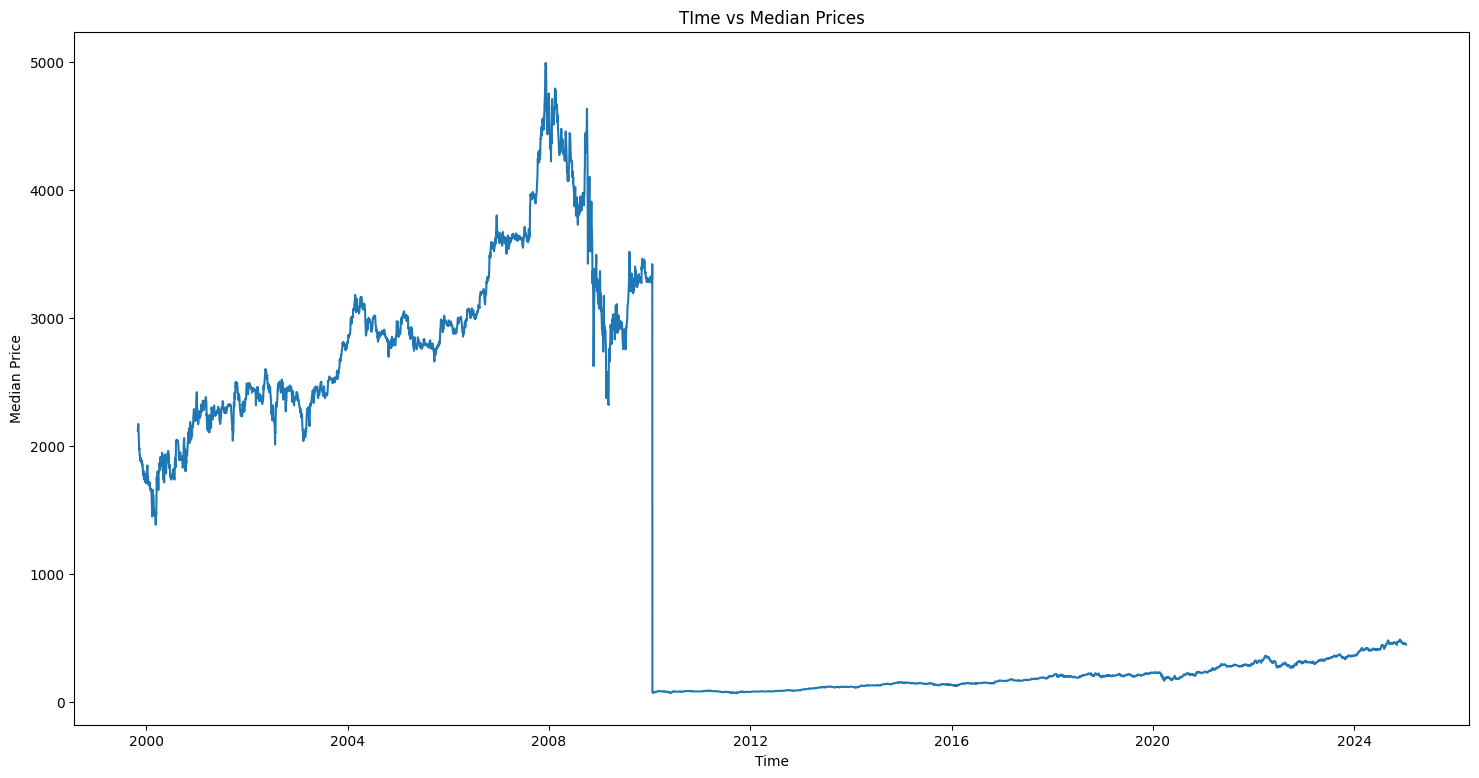

In [33]:
three_plotter(data['Date'], data['Low'], data['High'])

#### 3. Interactive Plots `Plotly`

##### 3.0 Rough

In [110]:
df.columns

Index(['Date', 'Low', 'High', 'Open', 'Close', 'Volume'], dtype='object')

##### 3.1 Box Plot

In [111]:
box = pex.box(df, x='Date', y=['Low', 'High', 'Open', 'Close'])
box.show()

##### 3.2 Line Graphs

In [112]:
line = pex.line(df, x='Date', y=['Low', 'High', 'Open', 'Close'])
line.show()

#### 4. Time Series Data Analysis

In [114]:
data.head()

Date     Low    High    Open   Close   Volume
6337  1999-11-01  2063.0  2170.0  2140.0  2087.0  21600.0
6336  1999-11-02  2099.0  2181.0  2099.0  2141.0  18200.0
6335  1999-11-03  2141.0  2187.0  2146.0  2153.0  16000.0
6334  1999-11-04  2149.0  2194.0  2163.0  2163.0   9800.0
6333  1999-11-05  2116.0  2219.0  2210.0  2131.0   9400.0

In [115]:
data.tail()

Date     Low      High    Open   Close     Volume
4  2025-01-03  450.12  454.5269  452.53  453.56  2887160.0
3  2025-01-06  450.57  456.2399  453.85  451.41  4072913.0
2  2025-01-07  451.10  456.5150  452.80  452.92  3507166.0
1  2025-01-08  449.63  454.0000  453.63  451.84  3933259.0
0  2025-01-10  440.10  453.0000  452.66  442.66  5471869.0

***Data Types of Time Series***

Let’s discuss the time series’ data types and their influence. While discussing TS data types, there are two major types – stationary and non-stationary.

* Stationary: A dataset should follow the below thumb rules without having Trend, Seasonality, Cyclical, and Irregularity components of the time series.

    * The mean value of them should be completely constant in the data during the analysis.
    * The variance should be constant with respect to the time-frame
    * Covariance measures the relationship between two variables.

* Non- Stationary: If either the mean-variance or covariance is changing with respect to time, the dataset is called non-stationary.

Source[\s]:
[Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/)

##### 4.1 Augmented Dickey-Fuller (ADF) Test or Unit Root Test
The ADF test is the most popular statistical test. It is done with the following assumptions:

Null Hypothesis (H0): Series is non-stationary
Alternate Hypothesis (HA): Series is stationary
p-value >0.05 Fail to reject (H0)
p-value <= 0.05 Accept (H1)

In [116]:
from statsmodels.tsa.stattools import adfuller
for i in data.columns:
    if i == 'Date': continue
    x = adfuller(data[i])
    s = f"For {i} : p-value = {x[1]}"
    if x[1] <= 0.05: s += ' : Series is Stationhary!'
    else: s += ' : Series is Non Staionary!'
    print(s)

For Low : p-value = 0.5481909423783445 : Series is Non Staionary!
For High : p-value = 0.5967818325454737 : Series is Non Staionary!
For Open : p-value = 0.5634536440565823 : Series is Non Staionary!
For Close : p-value = 0.552665311315926 : Series is Non Staionary!
For Volume : p-value = 2.420874225174702e-16 : Series is Stationhary!


##### 4.2 Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test
These tests assess a NULL Hypothesis (HO), perceiving the time series as stationary around a deterministic trend, in contrast to the alternative of a unit root. Since TSA is looking for Stationary Data for its further analysis, we have to ensure that the dataset is stationary.

In [117]:
from statsmodels.tsa.stattools import kpss
for i in data.columns:
    if i == 'Date': continue
    x = kpss(data[i])
    # s = f"For {i} : p-value = {x[1]}"
    # if x[1] <= 0.05: s += ' : Series is Stationhary!'
    # else: s += ' : Series is Non Staionary!'
    print(x)

(8.380622011613797, 0.01, 46, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(8.364342849478168, 0.01, 46, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(8.369834312389035, 0.01, 46, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(8.36914187673288, 0.01, 46, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(7.390556019960998, 0.01, 40, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\krato\AppData\Local\Temp\ipykernel_20976\2778601868.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\krato\AppData\Local\Temp\ipykernel_20976\2778601868.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\krato\AppData\Local\Temp\ipykernel_20976\2778601868.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\krato\AppData\Local\Temp\ipykernel_20976\2778601868.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\krato\AppData\Local\Temp\ipykernel_20976\277860

##### > Auto/Partial Auto Correlation Requires stationary data!

##### 4.3 Auto-Correlation

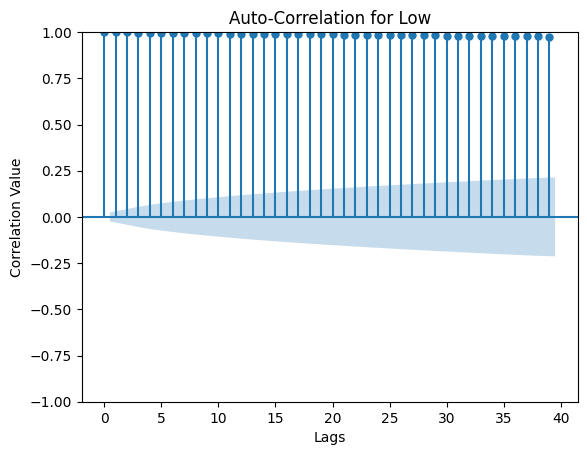

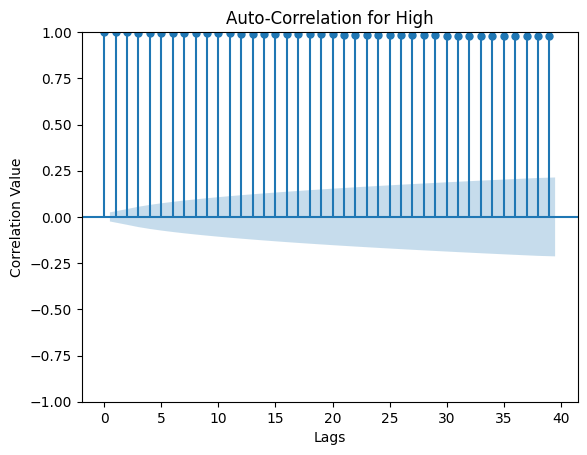

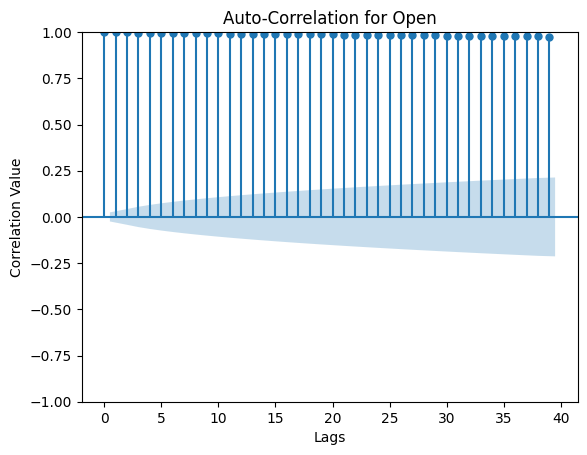

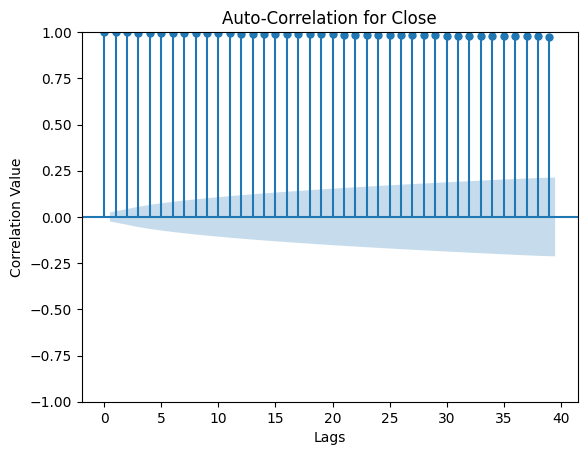

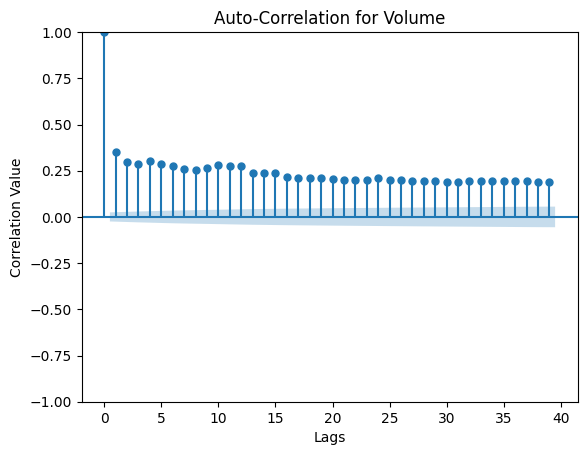

In [118]:
from statsmodels.graphics.tsaplots import plot_acf
for i in data.columns:
    if i == 'Date': continue
    plot_acf(data[i])
    plt.xlabel("Lags")
    plt.ylabel("Correlation Value")
    plt.title(f"Auto-Correlation for {i}")
    plt.show()

##### 4.4 Partial Auto Correlation

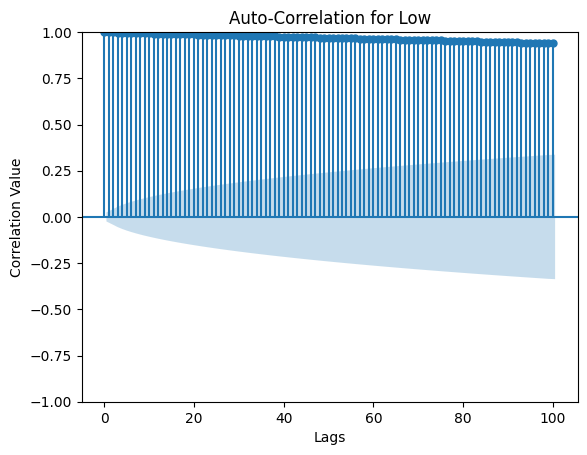

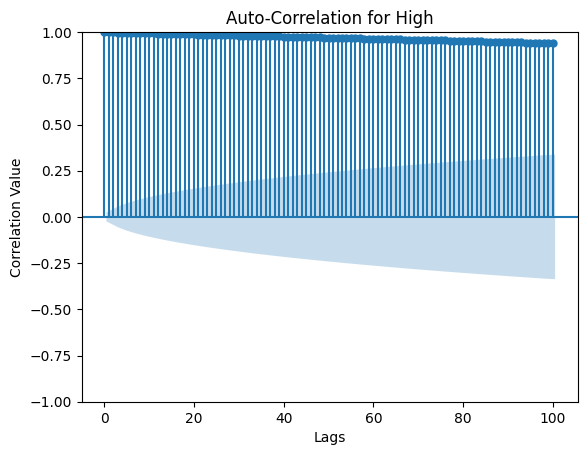

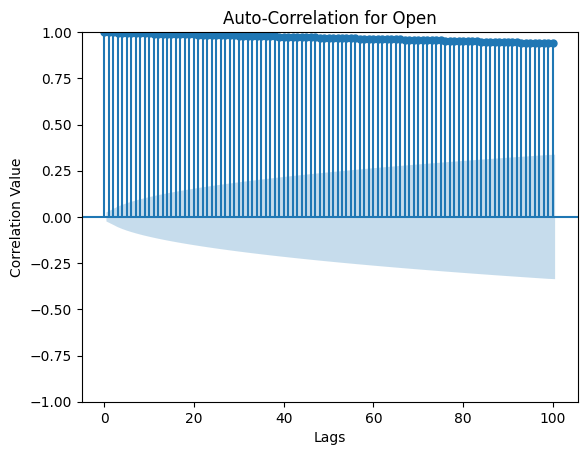

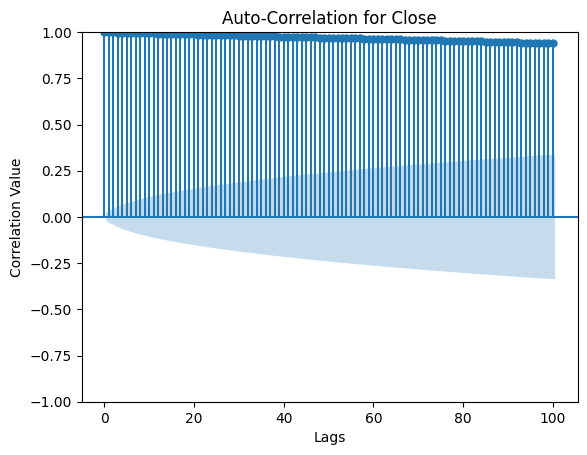

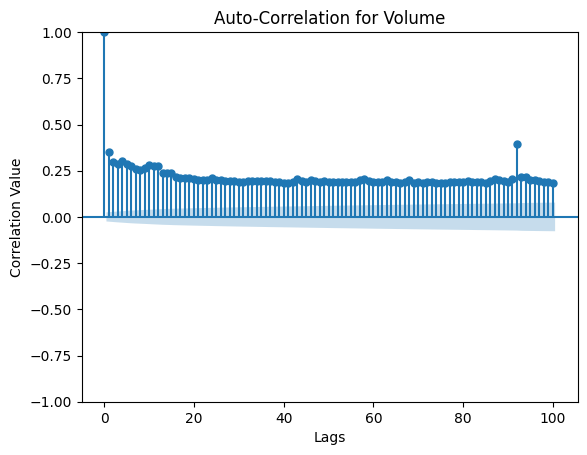

In [119]:
from statsmodels.graphics.tsaplots import plot_acf
for i in data.columns:
    if i == 'Date': continue
    plot_acf(data[i], lags=100)
    plt.xlabel("Lags")
    plt.ylabel("Correlation Value")
    plt.title(f"Auto-Correlation for {i}")
    plt.show()

## Preprocessing

#### 1. Mid Price Prediction

In [17]:
mid_prices = (data['High'].to_numpy() + data['Low'].to_numpy())/2.0

#### 2. Train Test Split

**Should not be random as this is time series data**

In [18]:
n = int(len(mid_prices)*0.8)
train, test = mid_prices[:n], mid_prices[n:]

In [19]:
train = train.reshape(-1, 1)
test = test.reshape(-1, 1)
print(f"Train shape: {train.shape} || Test Shape: {test.shape}")

Train shape: (5070, 1) || Test Shape: (1268, 1)


#### 3. Normalize data

In [25]:
scaler = MinMaxScaler()

##### Setting Smoothing Window Size

In [26]:
smoothing_window_size = int(input("Enter smoothing Window Size:"))
print(f"Window size set to: {smoothing_window_size}")

Window size set to: 1000


##### Normalising data on smoothing window

In [27]:
print(train.shape)
train_normalized = np.zeros((len(train), 1))
print(train_normalized.shape)
for i in range(0, len(train), smoothing_window_size):
    scaler.fit(train[i:i+smoothing_window_size, :])
    train_normalized[i:i+smoothing_window_size, :] = scaler.transform(train[i:i+smoothing_window_size, :])
print(f"Train 5: {train[:5, :]} || Train Normalized: {train_normalized[:5, :]}")

(5070, 1)
(5070, 1)
Train 5: [[2116.5]
 [2140. ]
 [2164. ]
 [2171.5]
 [2167.5]] || Train Normalized: [[0.60221675]
 [0.62151067]
 [0.64121511]
 [0.64737274]
 [0.64408867]]


In [28]:
train_normalized[-5:, :]

array([[0.94437552],
       [0.8974359 ],
       [0.97063689],
       [0.93424318],
       [0.91211745]])

In [29]:
train_mid = train_normalized.reshape(-1)
# train_mid = train_normalized
print(train_mid.shape)
test_mid = scaler.transform(test).reshape(-1)
# test_mid = scaler.transform(test)
test_mid.shape

(5070,)


(1268,)

##### Exponential Moving Average

$ema_i = \gamma . x_i + (1-\gamma).ema_{i-1}$

$\forall x_i \in train$

In [30]:
train_mid[:5]

array([0.60221675, 0.62151067, 0.64121511, 0.64737274, 0.64408867])

In [31]:
ema = 0
gamma = 0.1

for i in range(train_mid.shape[0]):
    ema = gamma * train_mid[i] + (1-gamma) * ema
    train_mid[i] = ema

In [32]:
train_mid[:5]


array([0.06022167, 0.11635057, 0.16883703, 0.2166906 , 0.25943041])

For Vizualisation

In [33]:
all_data = np.concatenate([train_mid, test_mid], axis=0)
all_data.shape

(6338,)

#### 4. One Step Ahead Prediction with Visualizations

##### Simple Averaging

In [34]:
window_size = 100
N = train_mid.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
        print(date)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_mid[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_mid[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for standard averaging: 0.00766


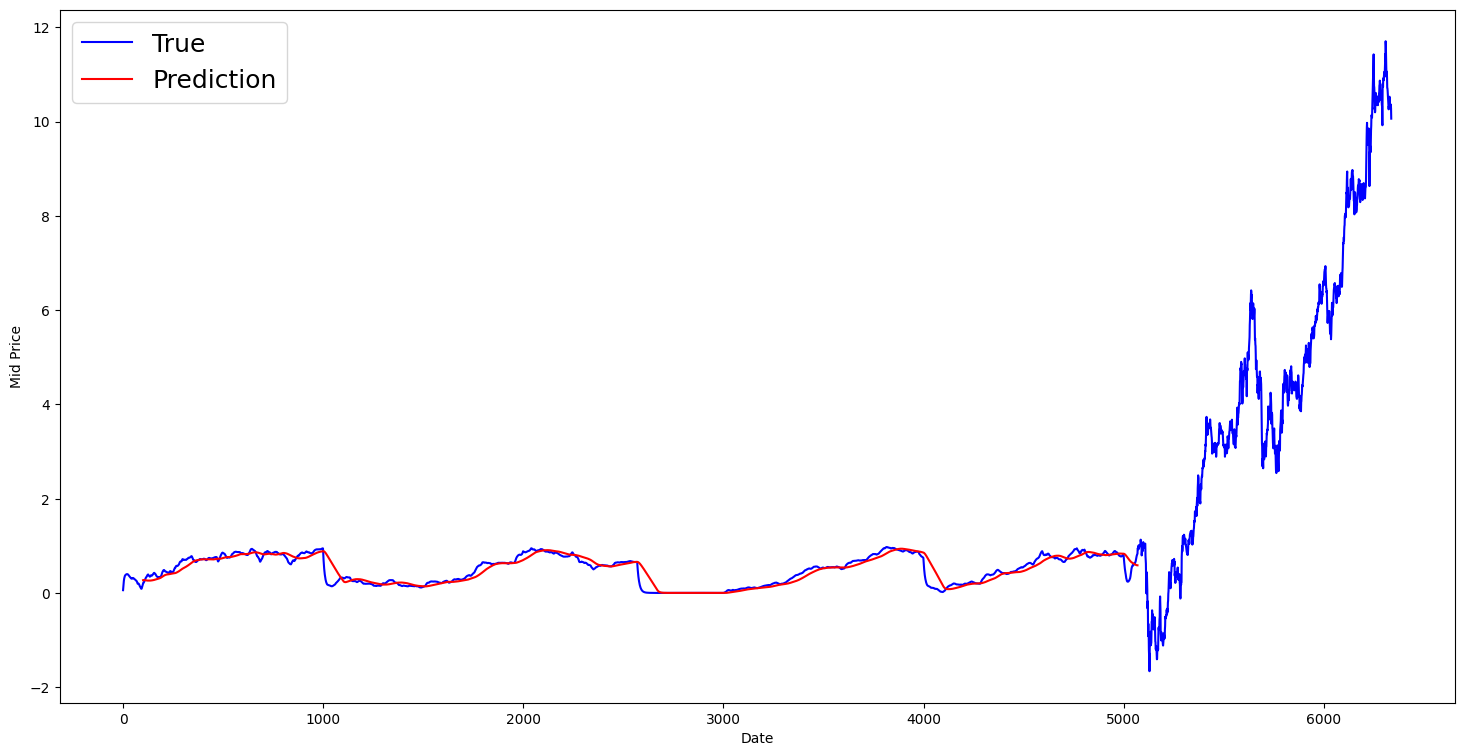

In [35]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='red',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

##### Exponential Averaging

In [36]:
window_size = 100
N = train_mid.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_mid[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_mid[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00007


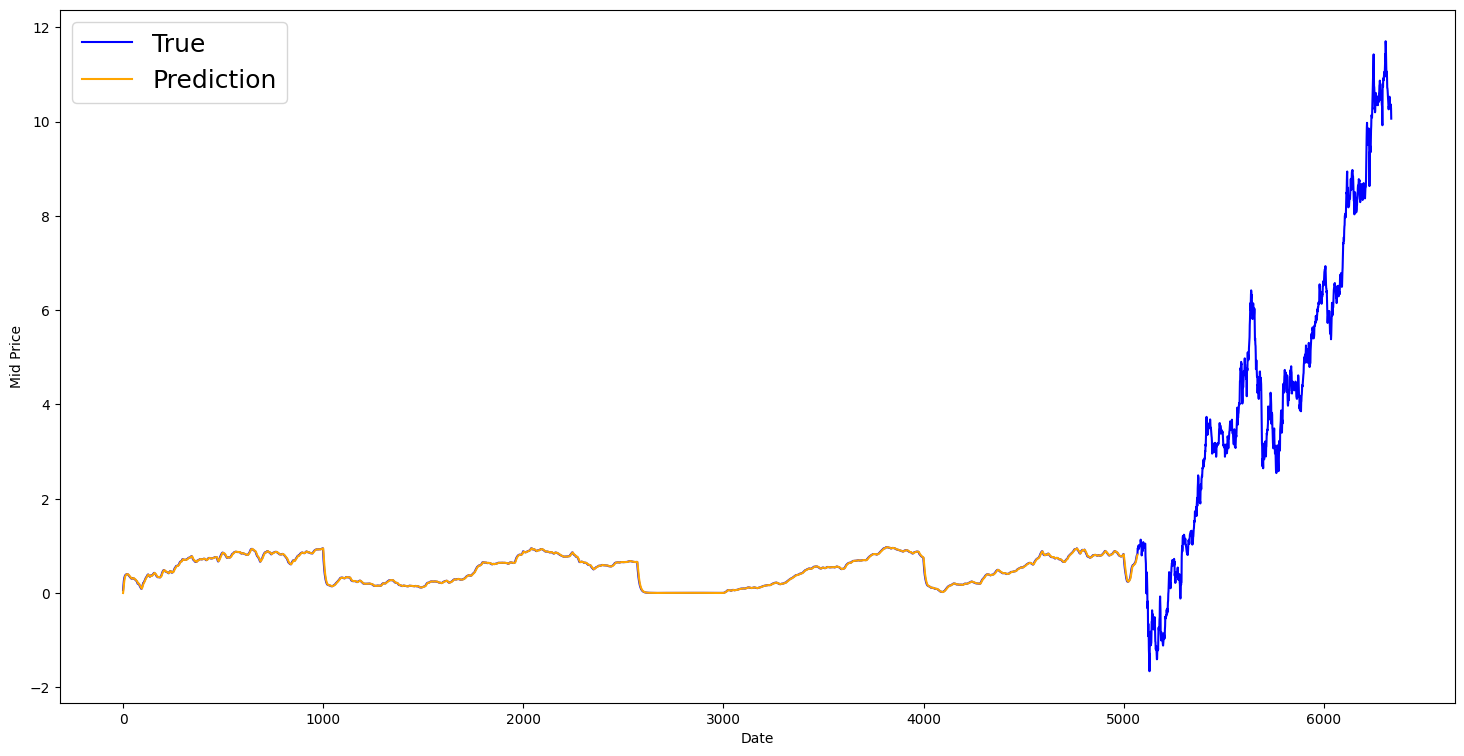

In [37]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

## LSTM

Introduction to LSTMs: Making Stock Movement Predictions Far into the Future
Long-short-term memory models are extremely powerful time-series models. They can predict an arbitrary number of steps into the future. An LSTM module (or cell) has 5 essential components, which allow it to model both long-term and short-term data.

Cell state (ct) - This represents the internal memory of the cell, which stores both short-term memory and long-term memories.

Hidden state (ht) - This is output state information calculated w.r.t. current input, previous hidden state, and current cell input, which you eventually use to predict the future stock market 
prices. Additionally, the hidden state can decide to only retrieve short- or long-term memories or both types of memory stored in the cell state to make the next prediction.

Input gate (it) - Decides how much information from current input flows to the cell state.

Forget gate (ft) - Decides how much information from the current input and the previous cell state flows into the current cell state.

Output gate (ot) - Decides how much information from the current cell state flows into the hidden state so that if needed LSTM can only pick the long-term memories or short-term memories and long-term memories.

A cell is pictured below:

 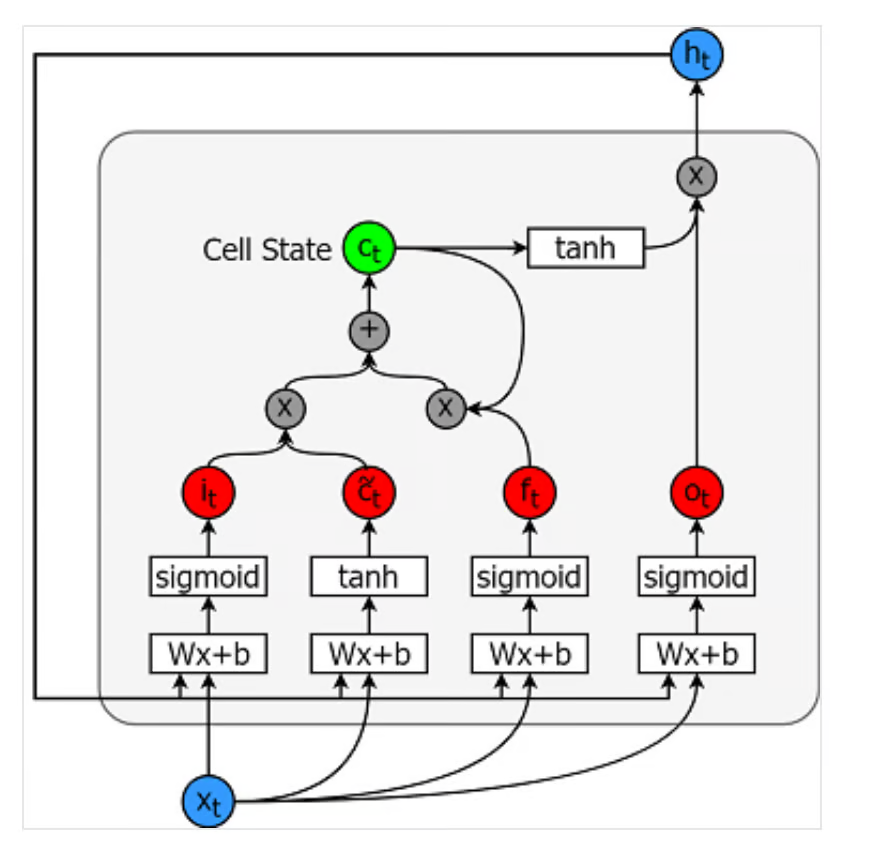


The equations for calculating each of these entities are as follows.

it = σ(WixXt + Wihht-1 + bi)
$\tilde{c}\_t = \sigma(W\_{cx}x\_t + W\_{ch}h_{t-1} + b_c)$

$f\_t = \sigma(W\_{fx}x\_t + W\_{fh}h_{t-1}+b_f)$

$c_t = f\_t c\_{t-1} + i_t \tilde{c}_t$

$o\_t = \sigma(W\_{ox}x\_t + W\_{oh}h_{t-1}+b_o)$

$h_t = o_t tanh(c_t)$

You can refer to this article for a better (more technical) understanding of LSTMs.

TensorFlow provides a nice API (called RNN API) for implementing time series models. You will be using that for your implementations.


Source:

- [DataCamp](https://www.datacamp.com/tutorial/lstm-python-stock-market)
- [Colah's Blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

> **Data generator**

You are first going to implement a data generator to train your model. This data generator will have a method called .unroll_batches(...) which will output a set of num_unrollings batches of input data obtained sequentially, where a batch of data is of size [batch_size, 1]. Then, each batch of input data will have a corresponding output batch of data.

For example if num_unrollings=3 and batch_size=4 a set of unrolled batches it might look like,


input data: $[x_0,x_{10},x_{20},x_{30}], [x_1,x_{11},x_{21},x_{31}], [x_2,x_{12},x_{22},x_{32}]$

output data: $[x_1,x_{11},x_{21},x_{31}], [x_2,x_{12},x_{22},x_{32}], [x_3,x_{13},x_{23},x_{33}]$



> **Data augmentation**

Also, to make your model robust, you will not make the output for $x\_t$ always $x\_{t+1}$. Rather you will randomly sample an output from the set $x\_{t+1},x\_{t+2},\ldots,x_{t+N}$ where $N$ is a small window size.

Here, you are making the following assumption:

$x_{t+1},x_{t+2},\ldots,x_{t+N}$ will not be very far from each other

I personally think this is a reasonable assumption for stock movement predictions.
Below, you illustrate how a batch of data is created visually.

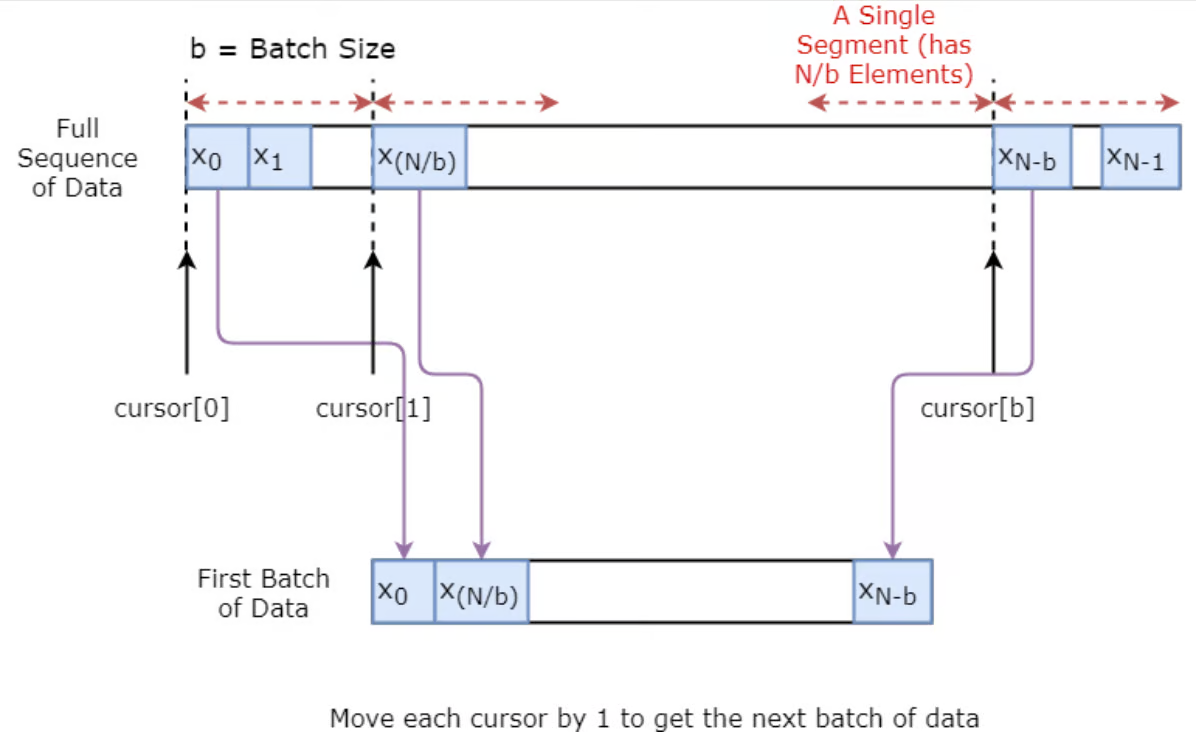



Source: [DataCamp](https://www.datacamp.com/tutorial/lstm-python-stock-market)

In [38]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_mid,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.06022168 0.26353267 0.89360356 0.04841571 0.10312374]

	Output: [0.06022168 0.20678683 0.89360356 0.04841571 0.09995239]


Unrolled index 1
	Inputs:  [0.11635058 0.24606502 0.8936867  0.05135728 0.09995239]

	Output: [0.29034287 0.20678683 0.8936867  0.05435767 0.0931705 ]


Unrolled index 2
	Inputs:  [0.16883703 0.23120925 0.89457864 0.05435767 0.09538597]

	Output: [0.29034287 0.23120925 0.89881754 0.05732942 0.09223483]


Unrolled index 3
	Inputs:  [0.2166906  0.21767777 0.8964624  0.05732942 0.09223483]

	Output: [0.2594304  0.20678683 0.9043662  0.06519868 0.0931705 ]


Unrolled index 4
	Inputs:  [0.2594304  0.20678683 0.89881754 0.05991127 0.09250537]

	Output: [0.2594304  0.1825363  0.9011275  0.06644959 0.08809037]


#### LSTM Model With Pytorch

##### Training

In [39]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [74]:
class MultiLSTM(nn.Module):
    def __init__(self, input_dim):
        super(MultiLSTM, self).__init__()
        self.layer1 = nn.LSTM(input_dim, 200, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.LSTM(200, 200, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.layer3 = nn.LSTM(200, 150, batch_first=True)
        self.linear = nn.Linear(150, 1)
        
    def forward(self, x, hidden_state=None, cell_state=None):
        h_1, h_2, h_3 = hidden_state[0] if hidden_state else None, hidden_state[1] if hidden_state else None, hidden_state[2] if hidden_state else None
        c_1, c_2, c_3 = cell_state[0] if cell_state else None, cell_state[1] if cell_state else None, cell_state[2] if cell_state else None 
        
        # passing states if provided to LSTM layer1
        if h_1 != None and c_1 != None: out, (h1, c1) = self.layer1(x, (h_1, c_1))
        elif h_1 != None and c_1==None: out, (h1, c1) = self.layer1(x, h_1)
        else: out, (h1, c1) = self.layer1(x)
        
        out = self.dropout1(out)
        
        # passing states if provided to LSTM layer2
        if h_2 != None and c_2 != None: out, (h2, c2) = self.layer2(out, (h_2, c_2))
        elif h_2 != None and c_2 == None: out, (h2, c2) = self.layer2(out, h_2)
        else: out, (h2, c2) = self.layer2(out)
        
        out = self.dropout2(out)
        
        # passing states if provided to LSTM layer3
        if h_3 != None and c_3 != None: out, (h3, c3) = self.layer3(out, (h_3, c_3))
        elif h_3 != None and c_3 == None: out, (h3, c3) = self.layer3(out, h_3)
        else: out, (h3, c3) = self.layer3(out)
        
        out = self.linear(out)
        return out, ([h1.detach(), h2.detach(), h3.detach()], [c1.detach(), c2.detach(), c3.detach()])


In [89]:
# Parameters
d = 1 # Number of dimensions of the data
num_unrolls = 10 # Number of time steps to unroll into a single batch or the sequence length
batch_size = 16 # number of samples per batch
epochs = 100 # Number of epochs to run training for

In [98]:

# Data Generator
data_gen = DataGeneratorSeq(train_mid, batch_size, num_unrolls)

# Model
model = MultiLSTM(d).to(device)


# Model related stuff
lr = 0.001
criterion = nn.functional.mse_loss
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Set pass states to 2 to send both hidden and cell state, 1 to pass only hidden state and 0 to not pass either
pass_state = 0

In [92]:
# Single input tensor for the entire sequence
train_inputs = torch.zeros(batch_size, num_unrolls, d)  # [batch_size, seq_len, input_dim]
train_outputs = torch.zeros(batch_size, num_unrolls, 1) # [batch_size, seq_len, output_dim]

In [99]:
train_loss = []
h, c = None, None

for epoch in range(epochs):
# Get unrolled batches of data and labels
    model.train()
    avg_loss = 0
    for step in range(train_mid.shape[0] // batch_size):
        # set the gradients to zero
        optimizer.zero_grad()
        
        u_data, u_labels = data_gen.unroll_batches()
        # Convert unrolled batches into PyTorch tensors
        # u_data is a list of num_unrollings tensors, each of shape [batch_size, input_dim]
        # u_labels is a list of num_unrollings tensors, each of shape [batch_size, output_dim]

        # Stack inputs and labels across time steps to form a 3D tensor
        train_inputs = torch.stack([torch.tensor(dat.reshape(-1, 1), dtype=torch.float32, device=device) for dat in u_data], dim=0)
        train_outputs = torch.stack([torch.tensor(lbl.reshape(-1, 1), dtype=torch.float32, device=device) for lbl in u_labels], dim=0)
        
        
        # Generate outputs
        out, (h, c) = model(train_inputs, h, c)
        
        # Set states for future reference
        if pass_state == 0: h, c = None, None
        elif pass_state == 1: c = None
        else: pass
        
        # Calculate Loss
        loss = criterion(out, train_outputs)
        
        # Add loss to average 
        avg_loss += loss.item()
        
        # Do Gradient Descent
        loss.backward()
        optimizer.step()
        
    train_loss.append(avg_loss / (train_mid.shape[0] // batch_size))
    print(f"Loss for epoch {epoch+1} is {train_loss[-1]})")
    
    

Loss for epoch 1 is 0.03539826808117118)
Loss for epoch 2 is 0.0010371454258278436)
Loss for epoch 3 is 0.000876719215785336)
Loss for epoch 4 is 0.0007105946599408583)
Loss for epoch 5 is 0.0006994673072491607)
Loss for epoch 6 is 0.0006502540410928063)
Loss for epoch 7 is 0.0006418918467405299)
Loss for epoch 8 is 0.0006190900568543827)
Loss for epoch 9 is 0.0006266450101883251)
Loss for epoch 10 is 0.0006309004941762903)
Loss for epoch 11 is 0.0005607963848657924)
Loss for epoch 12 is 0.0005843163797848481)
Loss for epoch 13 is 0.0005752353620353668)
Loss for epoch 14 is 0.0005380203297193739)
Loss for epoch 15 is 0.0005545051865772598)
Loss for epoch 16 is 0.0006132069185373957)
Loss for epoch 17 is 0.0005590158091567728)
Loss for epoch 18 is 0.0005226667515072925)
Loss for epoch 19 is 0.000516033109859195)
Loss for epoch 20 is 0.0005212373627866235)
Loss for epoch 21 is 0.0005120798107586606)
Loss for epoch 22 is 0.0005067297589690336)
Loss for epoch 23 is 0.0005311813996902142)
L

In [100]:
train_metric = sum(train_loss) / len(train_loss)
train_metric

0.0007981637170906896

##### Checkpointing

In [96]:
check_metric = train_metric
torch.save(model.state_dict(), os.path.join(os.getcwd()+'/checkpoint.pt'))

In [101]:
print(check_metric, train_metric)

0.000945201908418795 0.0007981637170906896


##### Save Trained Model if Required

In [102]:
def save_model(metric):
    with open(os.path.join(os.getcwd()+path), 'w') as file:
        file.write(str(metric))
    torch.save(model.state_dict(), os.path.join(os.getcwd()+'/model.pt'))

In [103]:
path = "/model_metric_train.txt"
print(os.getcwd())
if os.path.exists(os.getcwd() + path):
    metric = None
    with open(os.path.join(os.getcwd()+path), 'r+') as file:
        metric = float(file.readline())
    if metric == None: save_model(train_metric)
    else:
        c = input(f"Saved Model has beter train metrics (Average loss over Epochs) than current Model, save Nonetheless? [y/n]") if metric <= train_metric else input("There exists a saved model with worse train metrics (Average Loss over Epochs), overwrite? [y/n]")
        if c.lower() == 'y': save_model(metric)
else:
    save_model(train_metric)
    

d:\Projects


In [104]:
device

'cuda'

In [105]:
# For Test Predictions
number_of_days_to_predict = 30
predictions = []


##### Load Model

In [106]:
model = MultiLSTM(d)
model

MultiLSTM(
  (layer1): LSTM(1, 200, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (layer2): LSTM(200, 200, batch_first=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (layer3): LSTM(200, 150, batch_first=True)
  (linear): Linear(in_features=150, out_features=1, bias=True)
)

In [107]:
c = input("Enter path Manually? [y/n]")
if c == 'y':
    PATH = input("Enter Complete Path: ")
    assert os.path.exists(PATH) == True
else:
    PATH = os.getcwd()
    
checkpoint = torch.load(PATH+"/model.pt", weights_only=True)
model.load_state_dict(checkpoint)
model

MultiLSTM(
  (layer1): LSTM(1, 200, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (layer2): LSTM(200, 200, batch_first=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (layer3): LSTM(200, 150, batch_first=True)
  (linear): Linear(in_features=150, out_features=1, bias=True)
)

##### Testing and Prediction

> Testing

For Testing:

1. Set number of days [`num_unrolls`] to prime the model. Priming the model will feed data for [`num_unrolls`] days to set the hidden state with that information capturing pattern for that period in the data.
2. Set the number of predictions [`num_preds`] that will generate predictions sequentially for that many time steps by feeding the current input to predict next time step and then consequent predictions as input for further time step predictions. For eg: To predict for next 3 timesteps after priming the model, feed the input $i_0$ for current time step $t_0$ and predict $p_1$ for $t_1$, then use $p_1$ as input for timestep $t_1$ and predict $p_2$ for $t_2$ and finally use $p_3$ as input for timestep $t_2$ and predict $p_3$ for $t_3$.

In [112]:
# Params
num_unrolls = 10
num_preds = 7
device = "cuda" if torch.cuda.is_available() else "cpu"

criterion = nn.functional.mse_loss

pred_error = [] # Store Prediction error if possible

num_val_preds = 0
pred_hist= {}
model.to(device)
# Testing Phase
for i in range(0, test_mid.shape[0]):
    model.eval()
    
    # Reset model hidden layer 
    h, c = None, None
    #========================================================= Priming The model =================================================================================
    if 0 <= i <= num_unrolls:
        # for the First num_rolls batches, get data from the last num_unrolls - i entries in the train data to prime the model
        for j in range(-(num_unrolls - i), 1, 1):
            dat = torch.tensor(train_mid[j], dtype=torch.float32, device=device).reshape(1,1,1)
            _, (h, c) = model(dat, h, c)

        # ge tthe remaining first i entries from test set to prime the model    
        for k in range(i):
            dat = torch.tensor(test_mid[k], dtype=torch.float32, device=device).reshape(1,1,1)
            _, (h, c) = model(dat,h, c)

    else:
        # get the last num_unrolls to prime the model from test data itself
        for j in range(i - num_unrolls, i):
            dat = torch.tensor(test_mid[j], dtype=torch.float32, device=device).reshape(1,1,1)
            _, (h, c) = model(dat, h, c)
            
    #======================================================== Predicting for num_preds timesteps ===================================================================
    preds = []
    avg = 0
    
    # Define Ground Truths for timesteps
    if(i+num_unrolls+1 <= test_mid.shape[0]):
        y = torch.tensor(test_mid[i+1:i+num_unrolls+1], dtype=torch.float32, device=device)
    elif i < test_mid.shape[0]-1:
        y = torch.tensor(test_mid[i+1:], dtype=torch.float32, device=device)
    else:
        y = None
        
    # Predicting for next num_pred timesteps
    dat = torch.tensor(test_mid[i], dtype=torch.float32, device=device).reshape(1,1,1)
    for x in range(num_preds):
        dat, (h, c) = model(dat, h, c)
        if y != None and x < len(y):
            loss = criterion(dat, y[x])
            avg += loss
            pred_error.append(loss)
            
        preds.append(dat)
    
    if y != None:
        print(f"Avg {len(y)} timestep loss is {avg / len(y)}")
    pred_hist[i] = preds

C:\Users\krato\AppData\Local\Temp\ipykernel_23648\732818169.py:54: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = criterion(dat, y[x])


Avg 10 timestep loss is 0.005255242343991995
Avg 10 timestep loss is 0.007010519504547119
Avg 10 timestep loss is 0.010574943386018276
Avg 10 timestep loss is 0.011213484220206738
Avg 10 timestep loss is 0.009280807338654995
Avg 10 timestep loss is 0.012478663586080074
Avg 10 timestep loss is 0.014823609963059425
Avg 10 timestep loss is 0.017123395577073097
Avg 10 timestep loss is 0.02216474711894989
Avg 10 timestep loss is 0.023533998057246208
Avg 10 timestep loss is 0.02707940898835659
Avg 10 timestep loss is 0.028220105916261673
Avg 10 timestep loss is 0.0262187160551548
Avg 10 timestep loss is 0.021458832547068596
Avg 10 timestep loss is 0.013949356973171234
Avg 10 timestep loss is 0.008872319012880325
Avg 10 timestep loss is 0.006155724171549082
Avg 10 timestep loss is 0.003590623615309596
Avg 10 timestep loss is 0.0029781139455735683
Avg 10 timestep loss is 0.0044037275947630405
Avg 10 timestep loss is 0.021831423044204712
Avg 10 timestep loss is 0.014997792430222034
Avg 10 times

> Visualizations

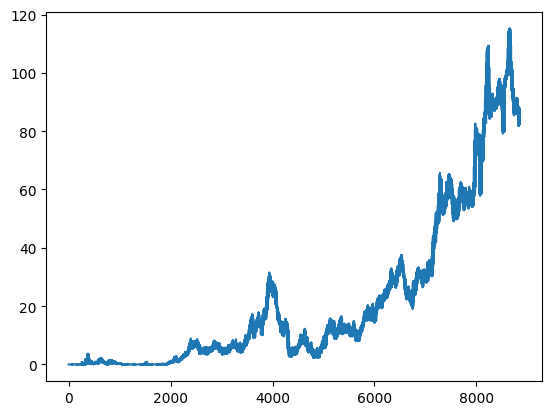

In [113]:
yval = [i.to("cpu").item() for i in pred_error]
plt.plot(np.arange(len(pred_error)), yval)
plt.show()